In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

53.62656651724521 123.2850194359383
-27.685227103487648 14.464020111715485
1.8754468786310525 126.42138044614194
43.17537975926504 -109.59237550643
19.499861070171704 -140.10131579031815
-42.77744204153053 19.292280028055472
-44.9077005481967 28.942533268456657
-59.826209077137264 -45.84943683608344
52.13568768132805 7.507209810748435
-76.35488127507345 128.42807278910482
-45.35032788124447 -20.47647961080301
-12.421185328888399 -137.9843991328794
71.70569596259966 -146.89930484224382
22.213554417081497 -175.51662927045706
79.15725114287977 135.2961256337657
-7.747191905360495 -166.30984986932
0.362501788318923 -130.69195235286483
-44.962566070023584 31.22564323749907
64.63813393700218 16.527609751493856
-56.06106321058657 76.55686131566472
-45.89898881626741 -43.124453106575174
38.42851559884028 -120.1566573768587
-69.81086901554339 -20.746622521863344
52.73699290370601 -15.105113747550291
9.62976684804977 -162.87325142243753
-61.16772911072455 -78.07607652772231
-56.46728162447514 -1

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [8]:
#import the requests library.
import requests

#import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e7a2780222784b6ca22894e39cd6cd


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "lompoc"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e7a2780222784b6ca22894e39cd6cd&q=lompoc


In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "lompoc"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "lompoc"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -120.4579, 'lat': 34.6391},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 70.65,
  'feels_like': 70.88,
  'temp_min': 63.32,
  'temp_max': 88.79,
  'pressure': 1012,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 14.97, 'deg': 270},
 'clouds': {'all': 0},
 'dt': 1659138799,
 'sys': {'type': 1,
  'id': 4747,
  'country': 'US',
  'sunrise': 1659100186,
  'sunset': 1659150397},
 'timezone': -25200,
 'id': 5367788,
 'name': 'Lompoc',
 'cod': 200}

In [14]:
# Get the JSON data.
boston_data = city_weather.json()

In [15]:
boston_data['sys']['country']

'US'

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

34.6391 -120.4579 88.79 74 0 14.97


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 7, 29, 23, 53, 19)

In [18]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-29 23:53:19'

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | takhtamygda
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | bitung
Processing Record 4 of Set 1 | lander
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | emsdetten
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | samusu
City not found. Skipping...
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | timra
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | south lake tahoe
Processing Record 22

Processing Record 37 of Set 4 | khatanga
Processing Record 38 of Set 4 | kathu
Processing Record 39 of Set 4 | cherskiy
Processing Record 40 of Set 4 | fairbanks
Processing Record 41 of Set 4 | boguchany
Processing Record 42 of Set 4 | marcona
City not found. Skipping...
Processing Record 43 of Set 4 | yar-sale
Processing Record 44 of Set 4 | oum hadjer
Processing Record 45 of Set 4 | geraldton
Processing Record 46 of Set 4 | brae
Processing Record 47 of Set 4 | kodiak
Processing Record 48 of Set 4 | kemijarvi
Processing Record 49 of Set 4 | tazovskiy
Processing Record 50 of Set 4 | butaritari
Processing Record 1 of Set 5 | aswan
Processing Record 2 of Set 5 | saldanha
Processing Record 3 of Set 5 | eldikan
City not found. Skipping...
Processing Record 4 of Set 5 | kananga
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | waingapu
Processing Record 7 of Set 5 | port hardy
Processing Record 8 of Set 5 | avera
Processing Record 9 of Set 5 | castro
Processing Reco

Processing Record 27 of Set 8 | berkak
Processing Record 28 of Set 8 | paamiut
Processing Record 29 of Set 8 | burica
City not found. Skipping...
Processing Record 30 of Set 8 | jacmel
Processing Record 31 of Set 8 | bac lieu
Processing Record 32 of Set 8 | eirunepe
Processing Record 33 of Set 8 | ust-nera
Processing Record 34 of Set 8 | bintulu
Processing Record 35 of Set 8 | porto novo
Processing Record 36 of Set 8 | tsabong
Processing Record 37 of Set 8 | fayaoue
Processing Record 38 of Set 8 | chicama
Processing Record 39 of Set 8 | rorvik
Processing Record 40 of Set 8 | ancud
Processing Record 41 of Set 8 | praia
Processing Record 42 of Set 8 | tsiroanomandidy
Processing Record 43 of Set 8 | popondetta
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | alpena
Processing Record 46 of Set 8 | upernavik
Processing Record 47 of Set 8 | trairi
Processing Record 48 of Set 8 | ende
Processing Record 49 of Set 8 | nome
Processing Record 50 of Set 8 | matara
Proc

Processing Record 18 of Set 12 | bonavista
Processing Record 19 of Set 12 | karamay
City not found. Skipping...
Processing Record 20 of Set 12 | darhan
Processing Record 21 of Set 12 | bay roberts
Processing Record 22 of Set 12 | havoysund
Processing Record 23 of Set 12 | aflu
City not found. Skipping...
Processing Record 24 of Set 12 | port moresby
Processing Record 25 of Set 12 | gumdag
Processing Record 26 of Set 12 | laksham
Processing Record 27 of Set 12 | hambantota
Processing Record 28 of Set 12 | guiratinga
Processing Record 29 of Set 12 | camocim
Processing Record 30 of Set 12 | nabire
Processing Record 31 of Set 12 | khasan
Processing Record 32 of Set 12 | jabiru
City not found. Skipping...
Processing Record 33 of Set 12 | santa cruz
Processing Record 34 of Set 12 | urumqi
Processing Record 35 of Set 12 | japura
Processing Record 36 of Set 12 | bethal
Processing Record 37 of Set 12 | nuevo progreso
Processing Record 38 of Set 12 | spilimbergo
Processing Record 39 of Set 12 | 

In [1]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'pd' is not defined

In [21]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-07-26 02:07:52,-21.3585,55.7679,64.22,83,59,11.41
1,Bluff,NZ,2022-07-26 02:04:34,-46.6000,168.3333,46.80,89,100,27.04
2,La Ronge,CA,2022-07-26 02:03:48,55.1001,-105.2842,63.09,55,90,3.31
3,Ancud,CL,2022-07-26 02:07:53,-41.8697,-73.8203,47.61,94,100,8.25
4,Camacha,PT,2022-07-26 02:07:53,33.0833,-16.3333,67.42,94,40,17.27


In [22]:
# Create the output file (csv).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658801454.761329

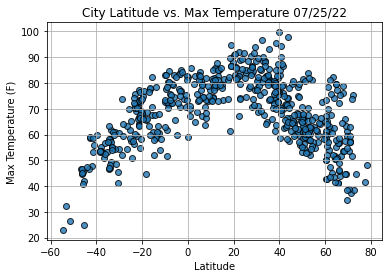

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

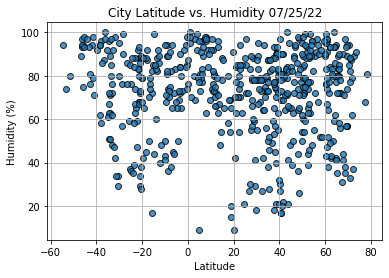

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

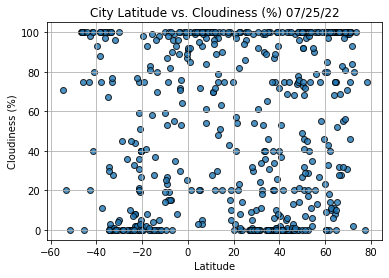

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

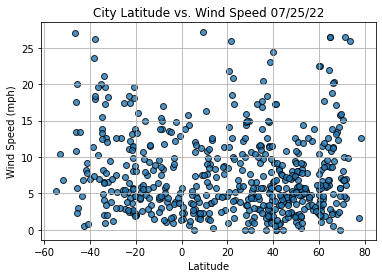

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2022-07-26 02:07:37
Lat                      -33.9258
Lng                       18.4232
Max Temp                    58.37
Humidity                       63
Cloudiness                      1
Wind Speed                   4.09
Name: 13, dtype: object

In [31]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,La Ronge,CA,2022-07-26 02:03:48,55.1001,-105.2842,63.09,55,90,3.31
4,Camacha,PT,2022-07-26 02:07:53,33.0833,-16.3333,67.42,94,40,17.27
6,Talnakh,RU,2022-07-26 02:07:54,69.4865,88.3972,61.21,57,31,7.18
7,Klaksvik,FO,2022-07-26 02:06:13,62.2266,-6.5890,47.32,84,40,9.19
8,Albany,US,2022-07-26 02:06:31,42.6001,-73.9662,71.37,64,0,8.52


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

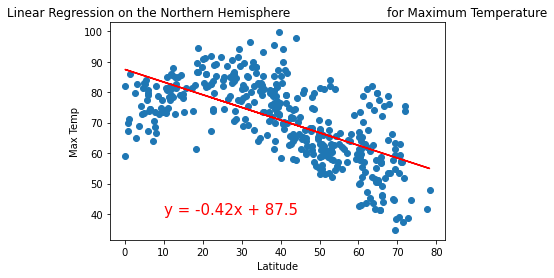

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

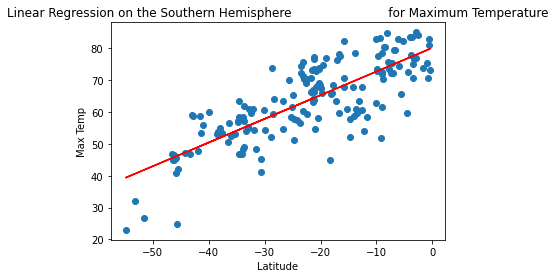

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

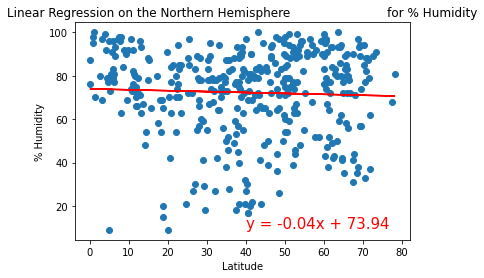

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

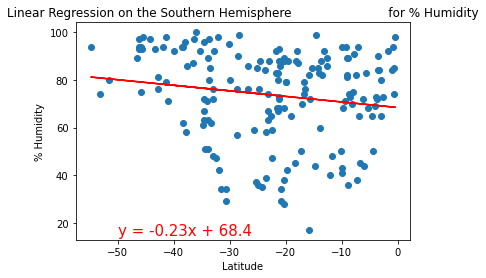

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

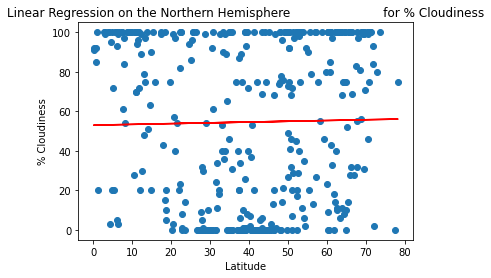

In [37]:
# Linear regression on the Northern Hemisphere and % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,15))

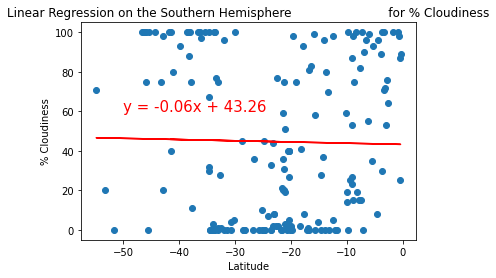

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

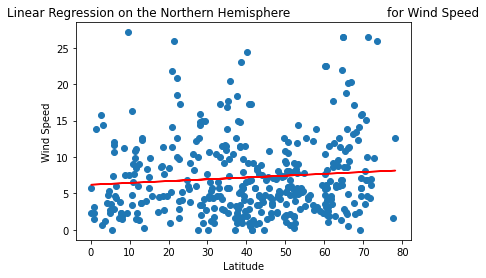

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(50,40))

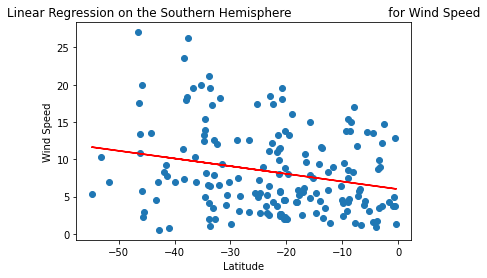

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))